Import dependencies

In [2]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

# Import and read the healthcare-dataset-stroke-data.csv.

stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data pre-processing


In [3]:
stroke_df.sample (10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3132,71192,Male,11.0,0,0,No,children,Rural,56.33,18.1,Unknown,0
4428,46079,Male,31.0,0,0,No,Private,Urban,78.80,28.7,smokes,0
4686,16029,Female,70.0,0,0,Yes,Self-employed,Rural,96.82,25.0,never smoked,0
1874,24066,Female,45.0,0,0,Yes,Private,Urban,72.65,25.6,Unknown,0
2307,7683,Male,49.0,0,0,Yes,Self-employed,Rural,220.47,36.4,smokes,0
1931,41911,Female,21.0,0,0,Yes,Private,Rural,149.90,23.4,Unknown,0
3436,42251,Male,71.0,1,1,Yes,Self-employed,Rural,67.06,26.7,smokes,0
820,71793,Female,21.0,0,0,No,Private,Urban,129.16,34.4,Unknown,0
4715,38642,Male,55.0,0,0,Yes,Private,Urban,63.56,29.9,Unknown,0
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1


In [4]:
# Get a brief summary of the crowdfunding_info DataFrame.
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


DATA CLEANING

In [6]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#remove unnecessary columns
stroke_df.drop(['id'],axis=1,inplace = True)

In [8]:
#remove duplicates values
stroke_df.drop_duplicates(inplace=True)

In [9]:
#null data handled
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Determining outliers

Outliers were removed from the dataset, BMI and avg glucose level fields contained quite a number of outliers and it was decided to clean the dataset of these, particularly as BMI ranging above 60 is very rare.  During a search of the literature on BMI, there was very little mention of BMI ranges above 40. So it was appropriate to remove the outliers in the BMI field.  Over 60 on the BMI range is considered super super morbidly obese, these figures would indicate an already unhealthy individual who may skew the datasets and are not representative of the overall population. "The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended". WHO, (https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,and%20monitoring%20glycemia%20are%20recommended.) Therefore it was reasonable to exclude outliers from the average glucose levels field.

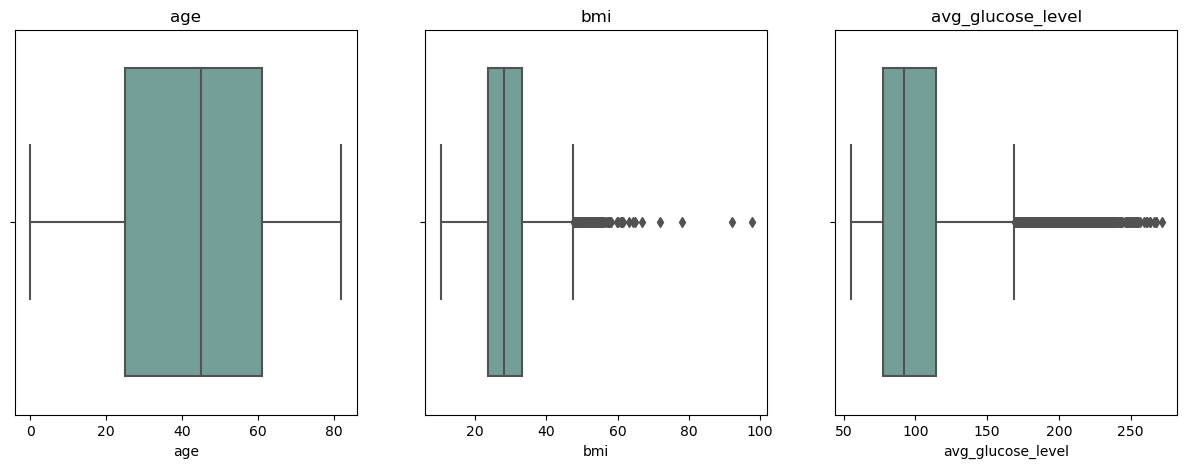

In [10]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=stroke_df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [11]:
def detect_outliers(data,column):
    q1 = stroke_df[column].quantile(.25)
    q3= stroke_df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = stroke_df.index[(stroke_df[column] <lower_bound) | (stroke_df[column] > upper_bound)]
    
    return ls

In [12]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(stroke_df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))
before_remove = stroke_df.shape

stroke_df =stroke_df.drop(index_list)
after_remove = stroke_df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4401, 11)


In [13]:
#before_remove = stroke_df.shape

#stroke_df =stroke_df.drop(index_list)
#after_remove = stroke_df.shape

#print(f'''Shape of data before removing outliers : {before_remove}
#Shape of data after remove : {after_remove}''')

DATA VISUALISATION

in order to retain data records the bmi column with NAN values was replaced with the average for that age group

In [14]:
# Create a series of average BMI for each age
avg_bmi_by_age = stroke_df.groupby('age')['bmi'].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.331507
79.00    27.916129
80.00    27.924000
81.00    27.597872
82.00    27.335897
Name: bmi, Length: 104, dtype: float64

In [15]:
# Replace NaN values in the "bmi" column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['bmi']):
        return avg_bmi_by_age[row['age']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(replace_bmi, axis=1)

In [16]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4401 non-null   object 
 1   age                4401 non-null   float64
 2   hypertension       4401 non-null   int64  
 3   heart_disease      4401 non-null   int64  
 4   ever_married       4401 non-null   object 
 5   work_type          4401 non-null   object 
 6   Residence_type     4401 non-null   object 
 7   avg_glucose_level  4401 non-null   float64
 8   bmi                4401 non-null   float64
 9   smoking_status     4401 non-null   object 
 10  stroke             4401 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 412.6+ KB


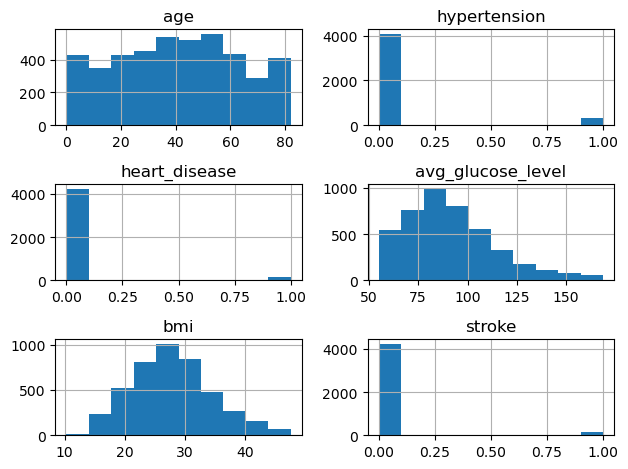

In [17]:
# Examine Data Distribution on numerical columns
stroke_df.hist()
plt.tight_layout()

some key features of the dataset, interesting to see that bmi is almost normally distributed

In [18]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2599
Male      1801
Other        1
Name: gender, dtype: int64

In [19]:
# Drop the record with gender = 'Other' (since there is only 1 record)
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [20]:
# Check if 'Other' is dropped on gender column
stroke_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

the 'other' section in the gender count was removed as there was only one value, we don't know if it was a data entry or other so it was removed

Text(0.5, 1.0, 'Gender Distribution')

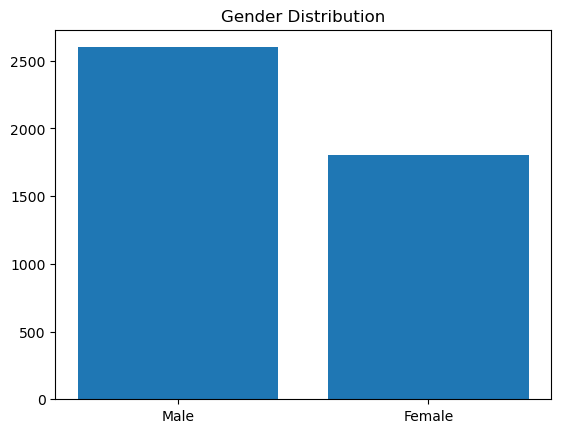

In [21]:
# Examine the distribution of gender column
plt.bar(stroke_df['gender'].unique(), stroke_df['gender'].value_counts())
plt.title('Gender Distribution')

In [22]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2488
children          675
Self-employed     662
Govt_job          553
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Work Type Distribution')

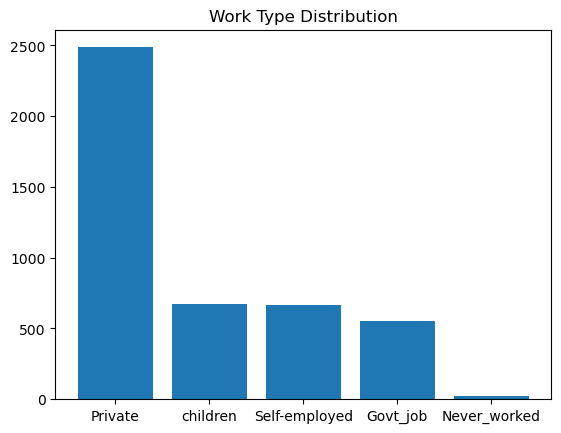

In [23]:
# Examine the distribution of work type column
plt.bar(work_counts.index, work_counts)
plt.title('Work Type Distribution')

In [24]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1598
Unknown            1422
formerly smoked     708
smokes              672
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Smoking Status Distribution')

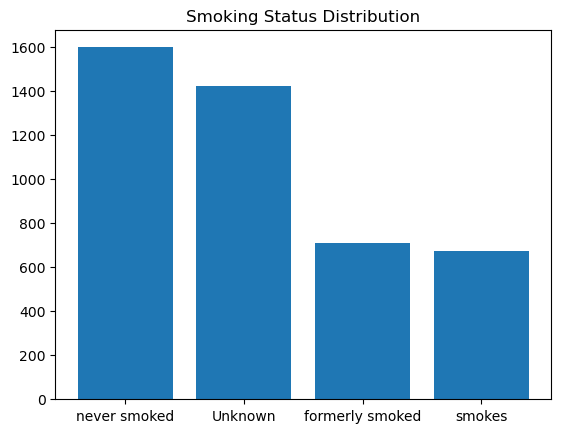

In [25]:
# Examine the distribution of smoking status column
plt.bar(smoke_counts.index, smoke_counts)
plt.title('Smoking Status Distribution')

In [26]:
#residence types 
Residence_types = dict(stroke_df['Residence_type'].value_counts())
fig = px.pie(names = Residence_types.keys(),values = Residence_types.values(),title = 'Residence type',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

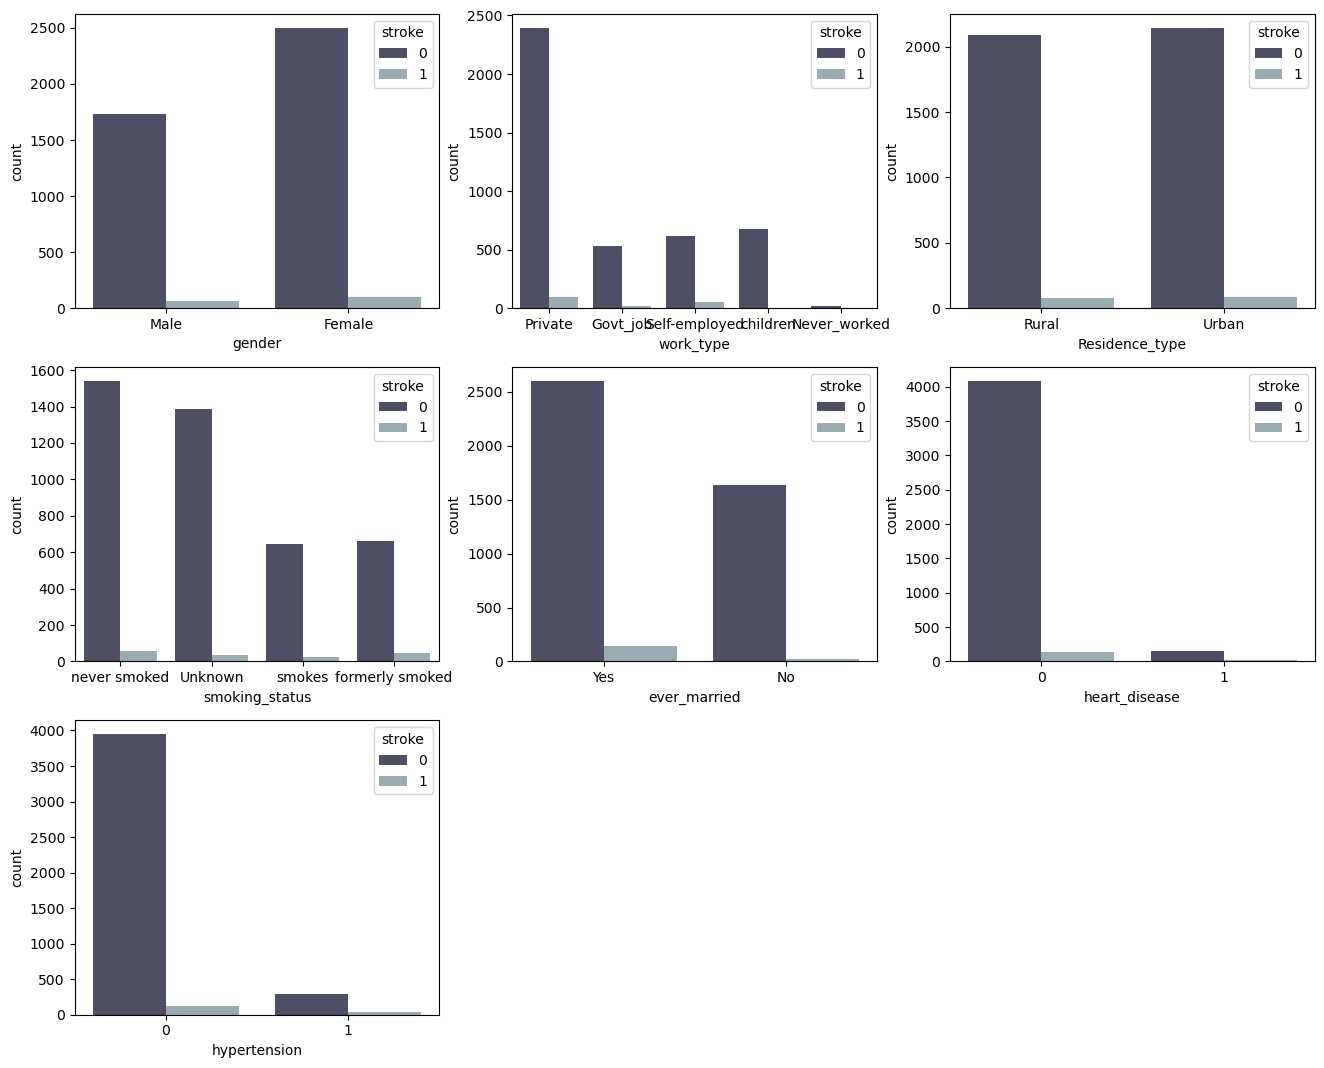

In [27]:
cols = ['gender','work_type','Residence_type','smoking_status','ever_married','heart_disease','hypertension']
plt.figure(figsize=(16,13))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    
    sns.countplot(x=stroke_df[cols[i]],hue = stroke_df['stroke'],palette = 'bone')

a breakdown of the dataset non-numerical features by stroke incidence. its interesting to see that smoking didn't seem to have a large impact on the incidence of stroke where people who have never smoked had a slightly higher incidence of stroke than those that smoked. Hypertension didn't seem to have a great incidence neither did heart disease

In [28]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4235
1     165
Name: stroke, dtype: int64

looking at the incidence of stroke vs non stroke, the non-stroke data entries outweigh the stroke entries indicating an imbalanced dataset which is quite common in disease prediction datasets. Its probably a positive factor that there are more healthy individuals vs those at risk!!

Findings: The 0s and 1s in stroke column is highly imbalanced

RESAMPLE UNBIASED DATA

In [29]:
df_0 = stroke_df[stroke_df.iloc[:,-1]==0]
df_1 = stroke_df[stroke_df.iloc[:,-1]==1]

stroke_df['stroke'].value_counts()

0    4235
1     165
Name: stroke, dtype: int64

In [30]:
from sklearn.utils import resample

df_1 = resample(df_1,replace=True , n_samples=df_0.shape[0] , random_state=123 )

In [31]:
#concentrate upsampled data 
df = np.concatenate((df_0,df_1))

#create the balanced dataframe
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# visualize balanced data 
stroke = dict(df['stroke'].value_counts())
fig = px.pie(names = ['False','True'],values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

DATA IS BALANCED SUCCESSFULLY

In [32]:
#Encoding data
df = pd.get_dummies(data =df , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,1,0,0,0,0
1,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,0,0,0
3,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,1,0,0
4,14.0,0,0,161.28,19.1,0,1,0,1,0,0,0,0,0,0,0


Data split (features - target)

In [33]:
x = df.drop('stroke', axis = 1)
y = pd.to_numeric( df['stroke'])

Data scaling

In [34]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

SPLIT DATA - TRAIN TEST

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

SINGLE DECISION TREE

In [36]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
y_pred = tree_model.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)

In [38]:
print(acc_score)

0.9858323494687131


In [39]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_pred, y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       806
           1       1.00      0.97      0.99       888

    accuracy                           0.99      1694
   macro avg       0.99      0.99      0.99      1694
weighted avg       0.99      0.99      0.99      1694



In [40]:
# First separate the target variable from the predictors
x = df.drop('stroke', axis = 1)
y = pd.to_numeric( df['stroke'])

In [41]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y)

In [42]:
# Create grid of parameters to search
params_grid = [{'max_depth': [2, 3, 4], 'min_samples_leaf': [10, 20, 30], 'max_features': [3, 5, 7]}]

In [43]:
# Train the decision tree on the training set

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create DecisionTree object
tree_raw = DecisionTreeClassifier()

# Run GridSearchCV with grid of parameters, 3-fold cross-validation
grid_search_raw = GridSearchCV(tree_raw, params_grid, cv=3)
grid_search_raw.fit(x_test, y_test)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [2, 3, 4], 'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30]}])

In [44]:
# Get the best combination of parameters
grid_search_raw.best_params_

{'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 30}

In [45]:
# Get the final model
final_tree_raw = grid_search_raw.best_estimator_

In [46]:
# Cross-validation with three folds to get average F1 score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_tree_raw, X_test, y_test, cv=3, scoring="f1_micro")

print("Scores:", scores)
print("Mean of scores:", scores.mean())

Scores: [0.73628319 0.77522124 0.77659574]
Mean of scores: 0.7627000564865374


In [47]:
pip install plot_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plot_confusion_matrix (from versions: none)
ERROR: No matching distribution found for plot_confusion_matrix


In [48]:
from sklearn.metrics import plot_confusion_matrix

# Define figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix
plot_confusion_matrix(final_tree_raw, X_test, y_test,
                      cmap="Blues_r", ax=ax);

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\becsh\OneDrive\Documents\anaconda\envs\dev\lib\site-packages\sklearn\metrics\__init__.py)

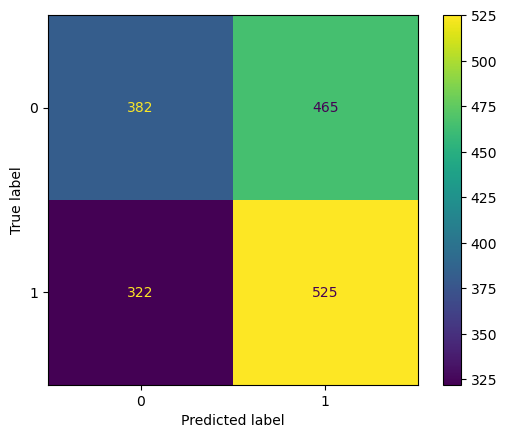

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


predictions = final_tree_raw.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=final_tree_raw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final_tree_raw.classes_)
disp.plot()

plt.show()
plt.savefig('project-4-stroke-predictions')

In [ ]:
print(final_tree_raw)

DecisionTreeClassifier(max_depth=2, max_features=5, min_samples_leaf=30)


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
import pydotplus
import matplotlib.image as mpimg

In [ ]:
from graphviz import Digraph
import pydotplus



(process:30472): GLib-GIO-WARNING **: 20:53:58.494: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:30472): GLib-GIO-WARNING **: 20:53:58.747: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.9.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



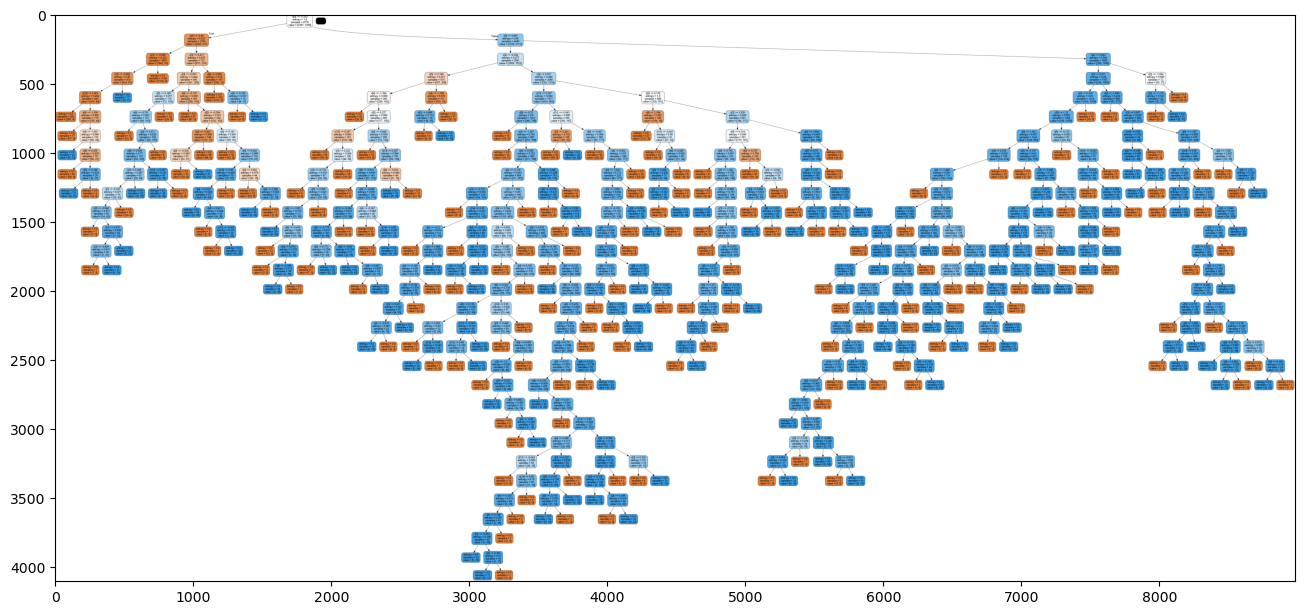

In [ ]:
from sklearn.tree import export_graphviz

# Create dot data
dot_data = export_graphviz(
                tree_model,
                out_file=None,
                rounded=True,
                filled=True
            )

# Write to PNG
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree_model.png')

# Show as pyplot figure
plt.figure(figsize=(16,20))
imgplot = plt.imshow(mpimg.imread('tree_model.png'))

plt.show()

Evaluation: In this optimization attempt, the single decision tree method is reasonably accurate, even after balancing the dataset